### Анализ зарплатных показателей в Data Science

#### Цель
Исследование факторов, влияющих на зарплату специалистов в Data Science, с целью выявления закономерностей и ключевых драйверов доходов в зависимости от уровня опыта, типа занятости, размера компании и других параметров.


##### Описание данных DataScience_salaries_2024:

* work_year - Год, за который были собраны данные о заработной плате.
* experience_уровень - уровень опыта сотрудника (EN - Entry-level, MI - Middle, SE - Senior, EX - Expert).
* employment_type - Тип занятости (FT - полный рабочий день, PT - неполный рабочий день, CT - контракт).
* job_title - Должность сотрудника в области обработки данных.
* salary - Заработная плата сотрудника в валюте, указанной в параметре salary_currency.
* salary_currency - валюта, в которой указывается заработная плата.
* salary_in_usd - Заработная плата сотрудника, пересчитанная в доллары США для стандартизации.
* employee_residence - место жительства сотрудника.
* remote_ratio - Процент удаленной работы, разрешенный для данной должности (например, 0, 50, 100).
* company_location - Местоположение компании, в которой работает сотрудник.
* company_size - Размер компании, основанный на количестве сотрудников (например, S - Малый, M - средний, L - крупный).

Ссылка на данные: https://www.kaggle.com/datasets/yusufdelikkaya/datascience-salaries-2024

Для начала посмотрим на сами данные.

In [122]:
import pandas as pd
import numpy as np
from scipy import stats as st
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
salaries = pd.read_csv('C:/Users/User/DataScience_salaries_2024.csv', sep=',')
salaries.head(10)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2021,MI,FT,Data Scientist,30400000,CLP,40038,CL,100,CL,L
1,2021,MI,FT,BI Data Analyst,11000000,HUF,36259,HU,50,US,L
2,2020,MI,FT,Data Scientist,11000000,HUF,35735,HU,50,HU,L
3,2021,MI,FT,ML Engineer,8500000,JPY,77364,JP,50,JP,S
4,2022,SE,FT,Lead Machine Learning Engineer,7500000,INR,95386,IN,50,IN,L
5,2021,MI,FT,ML Engineer,7000000,JPY,63711,JP,50,JP,S
6,2021,SE,FT,Data Science Manager,7000000,INR,94665,IN,50,IN,L
7,2022,EN,FT,Data Scientist,6600000,HUF,17684,HU,100,HU,M
8,2022,EX,FT,Head of Machine Learning,6000000,INR,76309,IN,50,IN,L
9,2022,EN,FT,Research Engineer,5500000,JPY,41809,JP,50,JP,L


In [123]:
salaries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14838 entries, 0 to 14837
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           14838 non-null  int64 
 1   experience_level    14838 non-null  object
 2   employment_type     14838 non-null  object
 3   job_title           14838 non-null  object
 4   salary              14838 non-null  int64 
 5   salary_currency     14838 non-null  object
 6   salary_in_usd       14838 non-null  int64 
 7   employee_residence  14838 non-null  object
 8   remote_ratio        14838 non-null  int64 
 9   company_location    14838 non-null  object
 10  company_size        14838 non-null  object
dtypes: int64(4), object(7)
memory usage: 1.2+ MB


In [124]:
salaries.duplicated().sum()

5711

Видим, что в наших данных нет пропусков в значениях, однако было обноружено 5 711 дубликатов, от которых нам необходимо избавиться.

In [125]:
salaries= salaries.drop_duplicates()
salaries.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9127 entries, 0 to 14837
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           9127 non-null   int64 
 1   experience_level    9127 non-null   object
 2   employment_type     9127 non-null   object
 3   job_title           9127 non-null   object
 4   salary              9127 non-null   int64 
 5   salary_currency     9127 non-null   object
 6   salary_in_usd       9127 non-null   int64 
 7   employee_residence  9127 non-null   object
 8   remote_ratio        9127 non-null   int64 
 9   company_location    9127 non-null   object
 10  company_size        9127 non-null   object
dtypes: int64(4), object(7)
memory usage: 855.7+ KB


In [127]:
salaries['employment_type'].value_counts()

employment_type
FT    9061
PT      27
CT      26
FL      13
Name: count, dtype: int64

Изучив структуру данных, была замечена описка, которая была устранена заменой FL на FT/

In [128]:
salaries['employment_type'] = salaries['employment_type'].replace('FL', 'FT')
salaries['employment_type'].value_counts()

employment_type
FT    9074
PT      27
CT      26
Name: count, dtype: int64

Далее посмотрим на визуальное представление наших данных.

<Axes: >

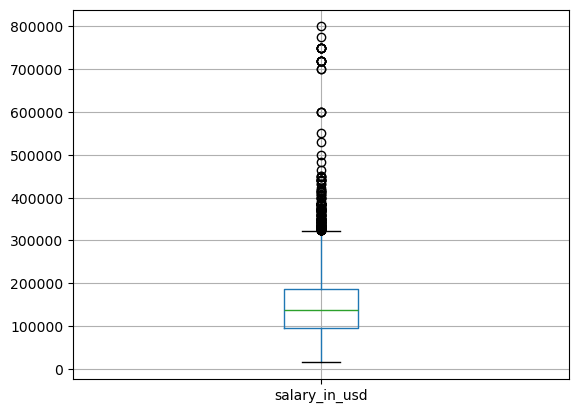

In [129]:
salaries.boxplot(column = 'salary_in_usd')

Видно, что в наших данных большое количество выбросов (аномальных значений), посмотрим на них подробнее.

In [130]:
salaries.query('salary_in_usd>300000').groupby('job_title').agg({'salary_in_usd': 'mean', 'job_title':'count'}).sort_values(by = 'salary_in_usd', ascending = False)

,salary_in_usd,job_title
job_title,,
Machine Learning Scientist,636250.000000,4
Prompt Engineer,600000.000000,1
Analytics Engineer,562706.666667,9
Data Analyst,505681.166667,6
AI Architect,440220.000000,5
Applied Machine Learning Scientist,423000.000000,1
AI Scientist,417937.000000,1
Principal Data Scientist,416000.000000,1
Research Engineer,401450.000000,15


Самой частой должностью, зарплата которой превышает верхнюю границу графика, является Machine Learning Engineer (эта позиция повторялась 43 раза), однако самой большой средней зарплатой среди аномальных значений является 636 250 (должность Machine Learning Scientist).

Также отдельно посмотрим на самую большую зарплату.

In [131]:
salaries.query('salary_in_usd==800000')

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
66,2024,MI,FT,AI Architect,800000,USD,800000,CA,100,CA,M


Ее получает AI Architect, стоит отметить, что его уровень опыта всего лишь средний, он полностью работает удалено в средней по размеру компании.

Теперь посмотрим внимательнее на должности.

In [149]:
salaries.job_title.unique()

array(['Data Scientist', 'BI Data Analyst', 'ML Engineer',
       'Lead Machine Learning Engineer', 'Data Science Manager',
       'Head of Machine Learning', 'Research Engineer',
       'Head of Data Science', 'AI Programmer',
       'Machine Learning Engineer', 'Lead Data Scientist',
       'Data Engineer', 'Applied Machine Learning Scientist',
       'Lead Data Analyst', 'Data Analytics Manager',
       'Data Integration Specialist', 'Principal Data Architect',
       'NLP Engineer', 'Big Data Engineer', 'AI Research Engineer',
       'Machine Learning Software Engineer', 'Data Analyst',
       'Applied Data Scientist', 'AI Scientist', 'Data Analytics Lead',
       'Business Data Analyst', 'Product Data Analyst',
       'Computer Vision Engineer', 'Data Science Consultant',
       'AI Architect', 'Analytics Engineer', 'Machine Learning Scientist',
       'Research Scientist', 'Prompt Engineer',
       'Principal Data Scientist', 'Applied Scientist',
       'Deep Learning Engineer', 

Всего представлено 154 варинта, они все различны, но при этом могут быть очень похожи. Для удобства и наглядности возьмем 10 самых популярных и сравним их средние зарплаты. 

In [152]:
list_with_top_titles = list(top_job_title.index)
new_frame = salaries[salaries.job_title.isin(list_with_top_titles)]
new_frame.groupby('job_title').salary_in_usd.describe().sort_values(by = 'mean', ascending = False)

,count,mean,std,min,25%,50%,75%,max
job_title,,,,,,,,
ML Engineer,145.0,198158.717241,83610.233823,15966.0,145000.0,189400.0,247250.00,530000.0
Research Scientist,288.0,189410.107639,90075.424401,23000.0,132500.0,171000.0,234175.00,720000.0
Machine Learning Engineer,867.0,180493.054210,72170.170144,20000.0,132600.0,175000.0,223850.00,750000.0
Research Engineer,194.0,180347.886598,96378.729760,16455.0,120000.0,158625.0,237487.50,720000.0
Data Architect,243.0,165275.251029,62674.451110,39245.0,120000.0,155615.0,198800.00,400000.0
Data Science,162.0,161996.981481,72982.360130,16666.0,110000.0,150000.0,209925.00,381500.0
Analytics Engineer,333.0,160617.789790,87737.137654,37573.0,115000.0,146100.0,185700.00,750000.0
Data Scientist,1684.0,149432.482779,66909.595900,16000.0,104650.0,144000.0,187214.75,750000.0
Data Engineer,1709.0,144969.702165,64004.721912,17025.0,98700.0,137200.0,184800.00,750000.0


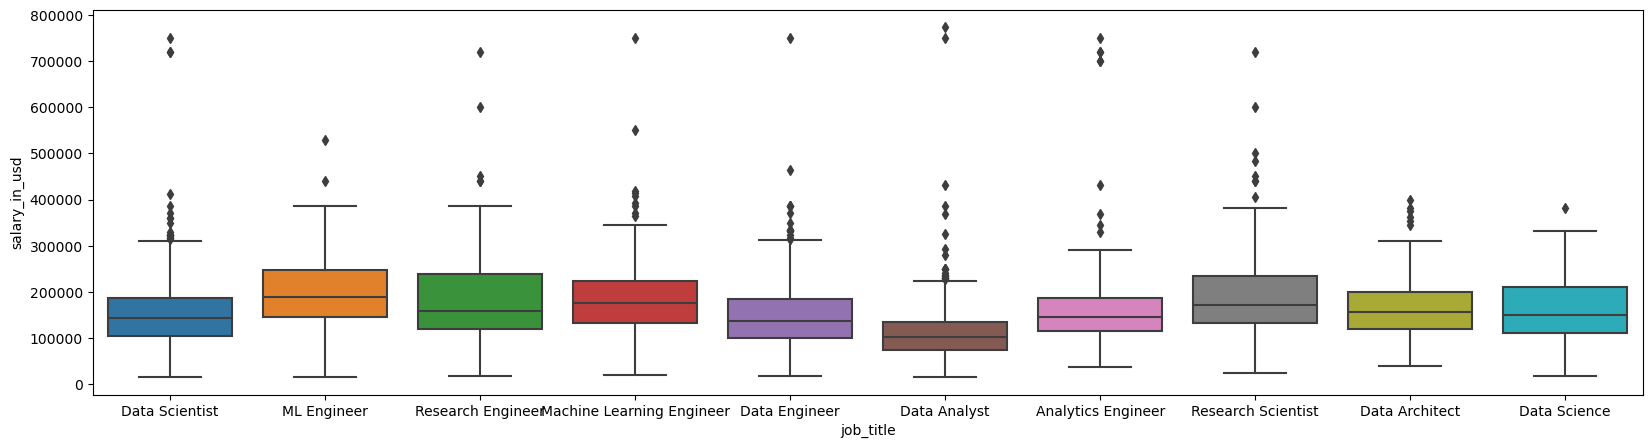

In [167]:
fig, ax = plt.subplots(figsize=(20, 5))
sns.boxplot(x='job_title', y='salary_in_usd', data=new_frame, ax=ax)
plt.show()

Заметим, что минимальное значение, характерное для различных должностей, примерно 16 000, однако самое большое значение у Data Architect. Кроме того, отметим, что наибольшая разница между минимальным и максимальным значением у Research Scientist.

Теперь исследуем вопрос наличия закономерностей между зарплатой и различными факторами.

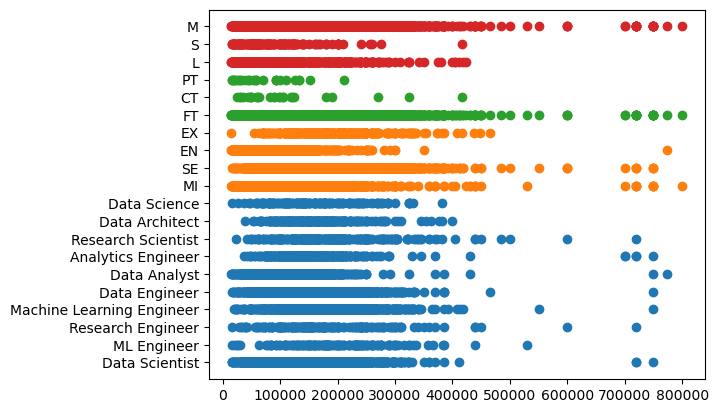

In [151]:
plt.scatter(x = new_frame['salary_in_usd'], y = new_frame['job_title'])
plt.scatter(x = salaries['salary_in_usd'], y = salaries['experience_level'])
plt.scatter(x = salaries['salary_in_usd'], y = salaries['employment_type'])
plt.scatter(x = salaries['salary_in_usd'], y = salaries['company_size'])

На первый взгляд, никакой зависимости не видно. Однако можно отметить несколько интересных моментов. 
* Во-первых, люди, работающие на контракте или на частичной занятости, не имеют слишком больших заработных плат (это неудивительно, потому что чаще всего по времени они работают меньше).
* Во-вторых, интересно отметить, что люди, работающие в большой компании или в маленькой, также не обладают слишком большими зарплатами.
* В-третьих, эсперты тоже не получают слишком больших зарплат. Также интересно отметить, что в нашей выборке есть сотрудник начального уровня с очень большой зарплатой относительно других.

Теперь проранжируем такие переменные, как experience_level, company_size, employment_type. Это позволит нам посчитать корреляцию. 

In [135]:
salaries['experience_level_new'] = salaries.experience_level.replace({'EN':1, 'MI':2, 'SE': 3, 'EX':4})
salaries['company_size_new'] = salaries.company_size.replace({'S':1, 'M':2, 'L': 3})
salaries['employment_type_new'] = salaries.employment_type.replace({'PT':1, 'CT':2, 'FT': 3})
salaries['experience_level_new'].corr(salaries['salary_in_usd'])

0.3632800348879155

Существует умеренная положительная корреляция между зарплатой и уровнем опыта. Это означает, что с увеличением опыта, как правило, увеличивается и зарплата. Это ожидаемо, так как более опытные специалисты обычно имеют более высокую ценность для работодателей.

In [136]:
salaries['company_size_new'].corr(salaries['salary_in_usd'])

-0.026364171071343676

Очень слабая корреляция.

In [142]:
salaries['employment_type_new'].corr(salaries['salary_in_usd'])

0.06260352087715004

Очень слабая корреляция.

In [143]:
salaries['remote_ratio'].corr(salaries['salary_in_usd'])

-0.06555250254928899

Очень слабая корреляция.

Все наши переменные обладают слабой корреляцией, при этом размер компании и процент удаленной работы имеют отрицательное влияние, то есть при увеличении размера компнаии/процента удаленной работы зарплата уменьшается. Впрочем в отрицательной зависимости размера компании и зарплаты мы уже успели убедиться ранее.

In [112]:
salaries.groupby('experience_level').salary_in_usd.describe().sort_values(by = 'mean', ascending = False)

,count,mean,std,min,25%,50%,75%,max
experience_level,,,,,,,,
EX,354.0,194466.076271,73207.432602,15000.0,143522.75,190250.0,235750.0,465000.0
SE,5414.0,163515.717215,68486.312250,15809.0,116300.00,154000.0,200000.0,750000.0
MI,2466.0,123633.489051,71958.470007,15000.0,76968.50,110820.0,153000.0,800000.0
EN,893.0,90049.220605,54254.222907,15000.0,54000.00,80000.0,115000.0,774000.0


In [110]:
salaries.groupby('employment_type').salary_in_usd.describe().sort_values(by = 'mean', ascending = False)

,count,mean,std,min,25%,50%,75%,max
employment_type,,,,,,,,
FT,9074.0,147081.508706,73265.576261,15000.0,95325.0,138800.0,185900.0,800000.0
CT,26.0,112007.500000,95205.536251,25500.0,50000.0,89444.0,120286.5,416000.0
PT,27.0,69608.037037,49895.031732,15966.0,29304.5,56000.0,96650.0,212000.0


In [111]:
salaries.groupby('company_size').salary_in_usd.describe().sort_values(by = 'mean', ascending = False)

,count,mean,std,min,25%,50%,75%,max
company_size,,,,,,,,
M,8323.0,149968.114382,72553.319342,15000.0,100000.0,140250.0,187885.00,800000.0
L,624.0,121162.450321,76253.625659,15000.0,63798.5,107317.0,165000.00,423000.0
S,180.0,86773.538889,58625.943153,15809.0,49817.0,71089.5,114285.25,416000.0


<Axes: xlabel='experience_level', ylabel='salary_in_usd'>

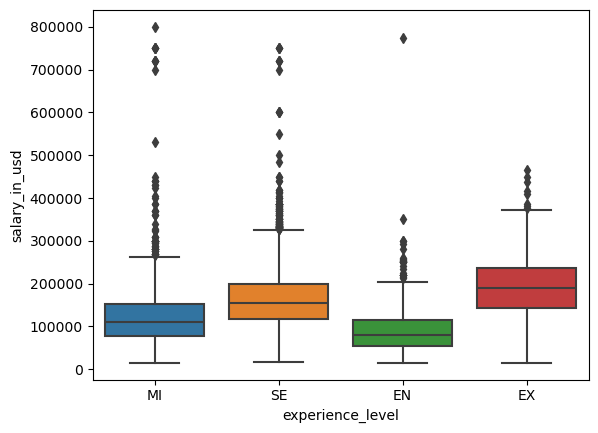

In [106]:
sns.boxplot(data=salaries, x="experience_level", y="salary_in_usd")

<Axes: xlabel='employment_type', ylabel='salary_in_usd'>

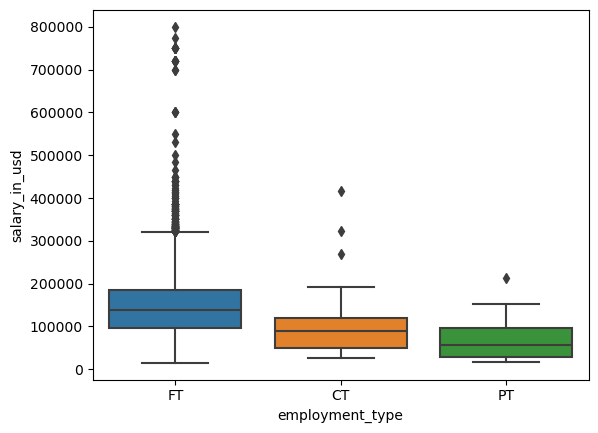

In [114]:
sns.boxplot(data=salaries, x="employment_type", y="salary_in_usd")

<Axes: xlabel='company_size', ylabel='salary_in_usd'>

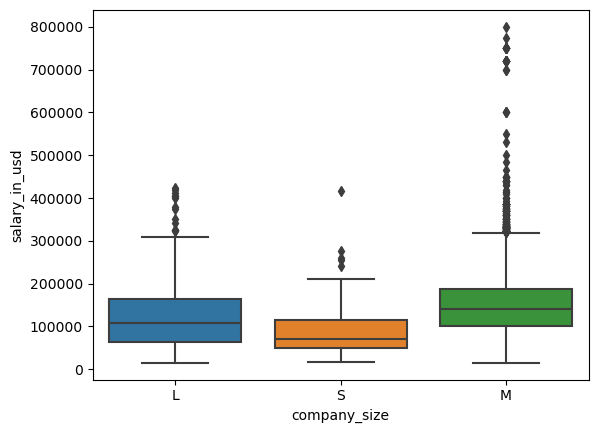

In [107]:
sns.boxplot(data=salaries, x="company_size", y="salary_in_usd")

#### Вывод

* Основным фактором, влияющим на уровень зарплаты в области Data Science, является уровень опыта.
* Размер компании, тип занятости и доля удаленной работы имеют незначительное влияние на зарплату.
